In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [16]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [17]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
X = data.iloc[:, :-1]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [19]:
Y = data.iloc[:, -1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Train Test split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((320, 2), (80, 2))

## Standard Scaling

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Finding k (Method 1)

In [22]:
k = np.sqrt(x_train.shape[0])
k

17.88854381999832

## KNN Model train

In [23]:
knn = KNeighborsClassifier(n_neighbors=int(k))
knn.fit(x_train, y_train)
y_predected = knn.predict(x_test)
y_predected

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

## Accuracy

In [24]:
accuracy_score(y_test, y_predected)

0.925

# Finding k (Method 2)

In [25]:
accuracy = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(x_test)))

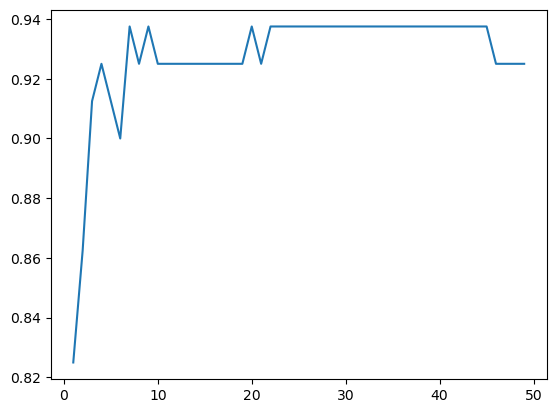

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1, 50), accuracy)
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
accuracy_score(y_test, y_predict)

0.95

In [14]:
def predict_output():
    age = int(input("Enter age : "))
    salary = int(input("Enter salary : "))
    
    input_test = np.array([age, salary]).reshape(1,2)
    scaled_input = scaler.transform(input_test)
    if knn.predict(scaled_input)[0]:
        return "Will purchase"
    return "Will not purchase"

In [15]:
print(predict_output())

Enter age : 55
Enter salary : 30000
Will purchase


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


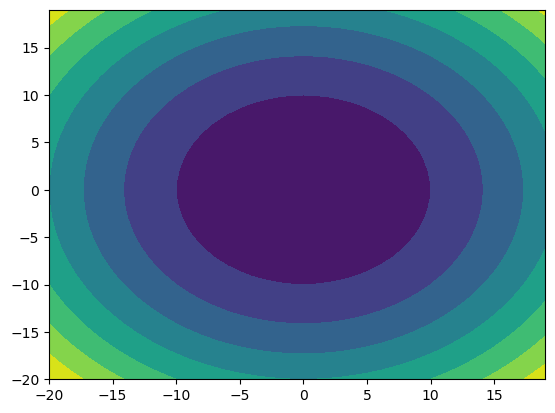

In [30]:
# x = np.array(np.arange(-20, 20))
# y = np.array(np.arange(-20, 20))
# XX, YY = np.meshgrid(x, y)
# z = (XX**2) + (YY**2)
# plt.contourf(XX, YY, z)